In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow==2.9.1 adabelief-tf==0.2.0

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/D.txt', delimiter=';')
#data = pd.read_csv('/content/drive/MyDrive/household_power_consumptionNew.csv')
data1 = data
df2 = pd.DataFrame(data1)

data['V1'] = pd.to_datetime(data['V1'])
print(data.head(10))

                           V1          V2  V3    V4   V5    V6
319001000000016001 2012-01-01  00:00:00     1  2.74  0.0  2.25
319001000000016001 2012-01-01  00:15:00     2  2.70  0.0  2.40
319001000000016001 2012-01-01  00:30:00     3  2.77  0.0  2.17
319001000000016001 2012-01-01  00:45:00     4  2.77  0.0  2.17
319001000000016001 2012-01-01  01:00:00     5  2.44  0.0  1.80
319001000000016001 2012-01-01  01:15:00     6  2.77  0.0  2.14
319001000000016001 2012-01-01  01:30:00     7  2.70  0.0  2.25
319001000000016001 2012-01-01  01:45:00     8  2.74  0.0  2.17
319001000000016001 2012-01-01  02:00:00     9  2.70  0.0  2.85
319001000000016001 2012-01-01  02:15:00    10  1.65  0.0  1.65


In [ ]:
df = pd.DataFrame(data)
print(df['V1'].tail())

319001000000016001   2012-12-31
319001000000016001   2012-12-31
319001000000016001   2012-12-31
319001000000016001   2012-12-31
319001000000016001   2012-12-31
Name: V1, dtype: datetime64[ns]


In [ ]:
df = pd.DataFrame(data)

data_types = df.dtypes

print(data_types)
df['V1'] = pd.to_datetime(df['V1'])
print(df)

V1    datetime64[ns]
V2            object
V3             int64
V4           float64
V5           float64
V6           float64
dtype: object
                           V1          V2     V3    V4   V5    V6
319001000000016001 2012-01-01  00:00:00        1  2.74  0.0  2.25
319001000000016001 2012-01-01  00:15:00        2  2.70  0.0  2.40
319001000000016001 2012-01-01  00:30:00        3  2.77  0.0  2.17
319001000000016001 2012-01-01  00:45:00        4  2.77  0.0  2.17
319001000000016001 2012-01-01  01:00:00        5  2.44  0.0  1.80
...                       ...         ...    ...   ...  ...   ...
319001000000016001 2012-12-31  22:45:00    35132  2.70  0.0  3.00
319001000000016001 2012-12-31  23:00:00    35133  2.85  0.0  3.30
319001000000016001 2012-12-31  23:15:00    35134  2.85  0.0  2.85
319001000000016001 2012-12-31  23:30:00    35135  2.85  0.0  2.85
319001000000016001 2012-12-31  23:45:00    35136  2.85  0.0  3.15

[35136 rows x 6 columns]


In [ ]:
data['year'] = data['V1'].apply(lambda x: x.year)
data['quarter'] = data['V1'].apply(lambda x: x.quarter)
data['month'] = data['V1'].apply(lambda x: x.month)
data['day'] = data['V1'].apply(lambda x: x.day)

In [ ]:
# import pandas as pd
# import numpy as np

# def remove_outliers(df, column_name):
#     # Calculate the first quartile (Q1) and third quartile (Q3)
#     Q1 = df['V6'].quantile(0.25)
#     Q3 = df['V6'].quantile(0.75)

#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for outliers detection
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Remove rows where the column value is an outlier
#     cleaned_df = df[(df['V6'] >= lower_bound) & (df['V6'] <= upper_bound)]

#     return cleaned_df

# # Example usage:
# # Sample DataFrame (replace this with your own DataFrame)


# # Remove rows with outliers in column 'B'
# cleaned_df = remove_outliers(df, 'V6')

# print("Original DataFrame:")
# print(df)
# print("\nCleaned DataFrame (without rows containing outliers in column 'B'):")

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data['V6'] = pd.to_numeric(data['V6'], errors='coerce')
data = data.dropna(subset=['V6'])

dataset = data.V6.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1
print(dataset)
scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)


train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# train_size = int(len(dataset) * 0.70)  # 70% for training
# val_size = int(len(dataset) * 0.15)    # 15% for validation
# test_size = len(dataset) - train_size - val_size  # Remaining for test

# train, val, test = dataset[0:train_size,:], dataset[train_size:train_size+val_size,:], dataset[train_size+val_size:,:]

[[2.25]
 [2.4 ]
 [2.17]
 ...
 [2.85]
 [2.85]
 [3.15]]


In [ ]:
# print(dataset)

In [ ]:
col_dates = data.V1.values
col_dates = np.reshape(col_dates, (-1, 1))
date_train, date_test = col_dates[0:train_size, :], col_dates[train_size:len(dataset), :]

# col_dates = data.V1.values
# col_dates = np.reshape(col_dates, (-1, 1))
# date_train, date_val, date_test = col_dates[0:train_size, :], col_dates[train_size:train_size+val_size,:], col_dates[train_size+val_size:,:]

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import os
# import datetime

# # Set floating point precision option for pandas
# pd.set_option('display.float_format', lambda x: '%.4f' % x)

# # Import seaborn library and set context and style
# import seaborn as sns
# sns.set_context("paper", font_scale=1.3)
# sns.set_style('white')

# # Import warnings and set filter to ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# # Import time library
# from time import time

# # Import matplotlib ticker and scipy stats
# import matplotlib.ticker as tkr
# from scipy import stats

# # Import statistical tools for time series analysis
# from statsmodels.tsa.stattools import adfuller

# # Import preprocessing from sklearn
# from sklearn import preprocessing

# # Import partial autocorrelation function from statsmodels
# from statsmodels.tsa.stattools import pacf

# # Enable inline plotting in Jupyter Notebook
# %matplotlib inline

# # Import math library
# import math

# # Import necessary functions from keras
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout
# from keras.layers import *

# # Import MinMaxScaler from sklearn
# from sklearn.preprocessing import MinMaxScaler

# # Import mean squared error and mean absolute error from sklearn
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# # Import early stopping from keras callbacks
# from keras.callbacks import EarlyStopping

In [ ]:
# import pandas as pd
# import numpy as np

# data = pd.read_csv('/content/drive/MyDrive/xaa.csv')
# data = data.iloc[:, 1:]

# data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
# data = data.dropna(subset=['Global_active_power'])

# data['date_time'] = pd.to_datetime(data['date_time'])

# data['year'] = data['date_time'].apply(lambda x: x.year)
# data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
# data['month'] = data['date_time'].apply(lambda x: x.month)
# data['day'] = data['date_time'].apply(lambda x: x.day)
# data['hour'] = data['date_time'].apply(lambda x: x.hour)

# data1=data.loc[:,['date_time','Global_active_power']]
# data1.set_index('date_time',inplace=True)

# dataset = data.Global_active_power.values.astype('float32')
# dataset = np.reshape(dataset, (-1, 1))
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)

# train_size = int(len(dataset) * 0.80)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# col_dates = data.date_time.values
# col_dates = np.reshape(col_dates, (-1, 1))
# date_train, date_test = col_dates[0:train_size, :], col_dates[train_size:len(dataset), :]

In [ ]:
def create_dataset(dataset, dates, look_back=1):
    X, Y = [], []
    d = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        d.append(dates[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(d)

look_back = 30




X_train, Y_train, d_train = create_dataset(train, date_train, look_back)
# X_val, Y_val, d_val = create_dataset(val, date_val, look_back)
X_test, Y_test, d_test = create_dataset(test, date_test, look_back)

X_train2, Y_train2, d_train2 = create_dataset(train, date_train, look_back)
X_test2, Y_test2, d_test2 = create_dataset(test, date_test, look_back)

X_train3, Y_train3, d_train3 = X_train, Y_train, d_train
X_test3, Y_test3, d_test3 = X_test, Y_test, d_test

X_train4, Y_train4, d_train4 = X_train, Y_train, d_train
# X_val4, Y_val4, d_val4 = X_val, Y_val, d_val
X_test4, Y_test4, d_test4 = X_test, Y_test, d_test

X_train5, Y_train5, d_train5 = X_train, Y_train, d_train
X_test5, Y_test5, d_test5 = X_test, Y_test, d_test

In [ ]:
X_train6, Y_train6, d_train6 =  create_dataset(train, date_train, look_back)
X_test6, Y_test6, d_test6 = create_dataset(test, date_test, look_back)

In [ ]:

Y_train.shape

(28077,)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(28077, 1, 30)

In [ ]:
print(X_train)

[[[0.05487804 0.06097561 0.05162602 ... 0.06707317 0.08536585 0.09756097]]

 [[0.06097561 0.05162602 0.05162602 ... 0.08536585 0.09756097 0.07926829]]

 [[0.05162602 0.05162602 0.03658536 ... 0.09756097 0.07926829 0.07926829]]

 ...

 [[0.4695122  0.51219505 0.47560975 ... 0.4207317  0.4817073  0.44512194]]

 [[0.51219505 0.47560975 0.40243903 ... 0.4817073  0.44512194 0.35975608]]

 [[0.47560975 0.40243903 0.37195122 ... 0.44512194 0.35975608 0.3902439 ]]]


In [ ]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))
X_train2.shape

X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))

X_train4 = np.reshape(X_train4, (X_train4.shape[0], 1, X_train4.shape[1]))
# X_val4 = np.reshape(X_val4, (X_val4.shape[0], 1, X_val4.shape[1]))
X_test4 = np.reshape(X_test4, (X_test4.shape[0], 1, X_test4.shape[1]))

X_train5 = np.reshape(X_train5, (X_train5.shape[0], 1, X_train5.shape[1]))
X_test5 = np.reshape(X_test5, (X_test5.shape[0], 1, X_test5.shape[1]))

In [ ]:
X_train6 = np.reshape(X_train6, (X_train6.shape[0], 1, X_train6.shape[1]))
X_test6 = np.reshape(X_test6, (X_test6.shape[0], 1, X_test6.shape[1]))

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input, Conv1D, Flatten
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tcn import TCN

# # Define the TCN model
# def create_tcn_model(input_shape):
#     model = Sequential([
#         Input(shape=input_shape),
#         TCN(nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8, 16, 32], return_sequences=True),
#         Flatten(),
#         Dense(64, activation='relu'),
#         Dense(1)  # Output layer for regression task
#     ])
#     return model

# # Define input shape (assuming input shape is (timesteps, features))
# input_shape = X_train5.shape[1:]

# # Create and compile the TCN model
# tcn_model = create_tcn_model(input_shape)
# tcn_model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# # Define early stopping callback to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# history5 = tcn_model.fit(X_train5, Y_train5, epochs=10, batch_size=256,
#                         validation_data=(X_test5, Y_test5), callbacks=[early_stopping])

# # Evaluate the model on the test data
# test_loss = tcn_model.evaluate(X_test5, Y_test5)

# # Print the test loss
# print("Test Loss:", test_loss)

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import *
# model = Sequential()

# # Adding the first layer with 100 LSTM units and input shape of the data
# model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# # Adding a dropout layer to avoid overfitting
# model.add(Dropout(0.2))

# # Adding a dense layer with 1 unit to make predictions
# model.add(Dense(1))

# # Compiling the model with mean squared error as the loss function and using Adam optimizer
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Fitting the model on training data and using early stopping to avoid overfitting
# history = model.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data=(X_test, Y_test),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Displaying a summary of the model
# model.summary()

In [ ]:
# from keras.callbacks import EarlyStopping
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# from tensorflow.keras.regularizers import l2  # Import from tensorflow.keras for L2

# model = Sequential()

# # Reduce number of units
# model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))

# # Remove Dropout temporarily (optional)
# # model.add(Dropout(0.2))

# # Add L2 regularization
# model.add(Dense(1, kernel_regularizer=l2(0.001)))

# # Compile and fit (rest remains same)
# model.compile(loss='mean_squared_error', optimizer='adam')
# history = model.fit(X_train, Y_train, epochs=10, batch_size=3200, validation_data=(X_test, Y_test),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# model.summary()

In [ ]:
!pip install keras-tcn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2
from keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
model1 = Sequential()

# Add the Bi-LSTM layer with 100 units in each direction
model1.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# Add dropout for regularization
model1.add(Dropout(0.2))

# Add another Bi-LSTM layer, no need for return_sequences here as it's the last LSTM layer
model1.add(Bidirectional(LSTM(100)))

# Add the output layer
model1.add(Dense(1))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history2 = model1.fit(X_train2, Y_train2, epochs=20, batch_size=128, validation_data=(X_test2, Y_test2),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Display model summary
model1.summary()



Epoch 1/20
220/220 [==============================] - 19s 43ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 2/20
220/220 [==============================] - 11s 52ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 3/20
220/220 [==============================] - 13s 59ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 4/20
220/220 [==============================] - 12s 56ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 5/20
220/220 [==============================] - 12s 54ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 6/20
220/220 [==============================] - 11s 49ms/step - loss: 0.0033 - val_loss: 0.0023
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 200)           104800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1,

In [ ]:
print("Shape of X_train2:", X_train2.shape)
print("Shape of Y_train2:", Y_train2.shape)
print("Shape of X_test2:", X_test2.shape)
print("Shape of Y_test2:", Y_test2.shape)


Shape of X_train2: (28077, 1, 30)
Shape of Y_train2: (28077,)
Shape of X_test2: (6997, 1, 30)
Shape of Y_test2: (6997,)


In [ ]:
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.regularizers import l2

# model1 = Sequential()

# # Reduce number of units in Bi-LSTM layers
# model1.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# # Remove Dropout temporarily

# model1.add(Bidirectional(LSTM(64)))

# # Add L2 regularization to Dense layer
# model1.add(Dense(1, kernel_regularizer=l2(0.001)))

# # Compile and fit (rest remains same)
# model1.compile(loss='mean_squared_error', optimizer='adam')
# history2 = model1.fit(X_train2, Y_train2, epochs=10, batch_size=1600, validation_data=(X_test2, Y_test2),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# model1.summary()

In [ ]:

# from tensorflow.keras.layers import GRU, Dropout, Dense

# model3 = Sequential()

# # Add the GRU layer with 100 units
# model3.add(GRU(100, input_shape=(X_train4.shape[1], X_train4.shape[2])))

# model3.add(Dropout(0.2))

# # # Add the output layer
# model3.add(Dense(1))
# # Add dropout for regularization

# # Compile the model
# model3.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model (same parameters as before, EarlyStopping removed)
# # history3 = model3.fit(X_train4, Y_train4, epochs=10, batch_size=1600, validation_data=(X_test4, Y_test4),
# #                     verbose=1, shuffle=False)
# history3 = model3.fit(X_train4, Y_train4, epochs=10, batch_size=1600, validation_data=(X_test4, Y_test4),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# # Display model summary
# model3.summary()

In [ ]:
# from tensorflow.keras.layers import GRU, Dense
# from tensorflow.keras.regularizers import l2

# model4 = Sequential()

# # Reduce number of units
# model4.add(GRU(64, input_shape=(X_train3.shape[1], X_train3.shape[2])))

# # Remove dropout layer (optional)
# # model4.add(Dropout(0.2))

# # Add L2 regularization to Dense layer
# model4.add(Dense(1, kernel_regularizer=l2(0.001)))

# # Compile and fit (rest remains same)
# model4.compile(loss='mean_squared_error', optimizer='adam')
# history4 = model4.fit(X_train3, Y_train3, epochs=10, batch_size=1600, validation_data=(X_test3, Y_test3),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# model4.summary()

In [ ]:
X_train3

array([[[0.05487804, 0.06097561, 0.05162602, ..., 0.06707317,
         0.08536585, 0.09756097]],

       [[0.06097561, 0.05162602, 0.05162602, ..., 0.08536585,
         0.09756097, 0.07926829]],

       [[0.05162602, 0.05162602, 0.03658536, ..., 0.09756097,
         0.07926829, 0.07926829]],

       ...,

       [[0.4695122 , 0.51219505, 0.47560975, ..., 0.4207317 ,
         0.4817073 , 0.44512194]],

       [[0.51219505, 0.47560975, 0.40243903, ..., 0.4817073 ,
         0.44512194, 0.35975608]],

       [[0.47560975, 0.40243903, 0.37195122, ..., 0.44512194,
         0.35975608, 0.3902439 ]]], dtype=float32)

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2  # Import both L1 and L2 for exploration
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Assuming your data is preprocessed and scaled (if necessary)

...  # Your testing labels (same shape as Y_train3)

# Define hyperparameters (adjust as needed)
n_layers = 1  # Experiment with number of GRU layers (start with 1)
n_units = 100  # Experiment with number of units per layer
learning_rate = 0.001  # Experiment with different learning rates
dropout_rate = 0.2  # Experiment with different dropout rates
regularizer = l2(0.001)  # Experiment with L1/L2 regularization (start with L2)

# Create the GRU model with hyperparameter flexibility
def create_gru_model(input_shape, n_layers=1, n_units=64, learning_rate=0.001,
                     dropout_rate=0, regularizer=None):

  model = tf.keras.Sequential()

  for _ in range(n_layers):
    return_sequences = True if n_layers > 1 else False  # Adjust for stacked layers
    model.add(GRU(n_units, activation='tanh', return_sequences=return_sequences, input_shape=input_shape))
    if dropout_rate > 0:
      model.add(Dropout(dropout_rate))  # Add dropout for regularization

  # Add regularization to Dense layer
  model.add(Dense(1, activation='linear', kernel_regularizer=regularizer))

  # Compile the model
  model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))

  return model

# Create the model with appropriate input shape
model4 = create_gru_model(X_train3.shape[1:])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

# Train the model (adjust epochs and batch size based on dataset size and hardware)
history4 = model4.fit(X_train3, Y_train3, epochs=20, batch_size=128,  # May need more epochs
                       validation_data=(X_test3, Y_test3), callbacks=[early_stopping], verbose=1, shuffle=False)

# Print model summary
model4.summary()

# Make predictions (optional)
predictions = model4.predict(X_test3)  # Get predictions on testing data

# You can further process predictions here (e.g., inverse transform if scaling was applied)

Epoch 1/20
220/220 [==============================] - 6s 12ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 3/20
220/220 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 4/20
220/220 [==============================] - 1s 5ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 5/20
220/220 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 6/20
220/220 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 7/20
220/220 [==============================] - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 8/20
220/220 [==============================] - 1s 6ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 9/20
220/220 [==============================] - 2s 8ms/step - loss: 0.0031 - val_loss: 0.0022
Model: "sequential_1"
_________________________________________________________________
 Layer (typ

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Dropout, GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers import Input, Embedding, GRU, LSTM, MaxPooling1D, GlobalMaxPool1D
from keras.layers import Dropout, Dense, Activation, Flatten,Conv1D, Bidirectional, SpatialDropout1D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop


def generate_CNN_GRU_model(input_shape):
    inp = Input(shape=input_shape)
    x = Conv1D(64, 5, activation='relu')(inp)
    x = MaxPooling1D(2)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = GRU(64)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inp, outputs=output)
    model.summary()
    return model

# Assuming X_train.shape = (num_samples, num_timesteps, num_features)
input_shape = (30, 1)  # Adjust the input shape to match the data shape

# Generate the CNN-GRU model
model_cnn_gru = generate_CNN_GRU_model(input_shape)

# Compile the model
model_cnn_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# Reshape the input data to match the model input shape
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])

# Train the model
history_cnn_gru = model_cnn_gru.fit(X_train_reshaped, Y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1, shuffle=True)

# Predict on test set

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 64)           0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 64)           256       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 13, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960 

In [ ]:
from sklearn.metrics import *

X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])

# Train the model
history_cnn_gru = model_cnn_gru.fit(X_train_reshaped, Y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1, shuffle=True)

# Make predictions
train_predict = model_cnn_gru.predict(X_train_reshaped)
test_predict = model_cnn_gru.predict(X_test_reshaped)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate and print errors
print('Train Mean Absolute Error:', mean_absolute_error(Y_train, train_predict))
print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_train, train_predict)))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict))
print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, test_predict)))

Epoch 1/20
351/351 [==============================] - 10s 27ms/step - loss: 0.0036 - accuracy: 0.0022 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 2/20
351/351 [==============================] - 8s 24ms/step - loss: 0.0036 - accuracy: 0.0022 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 3/20
351/351 [==============================] - 9s 24ms/step - loss: 0.0036 - accuracy: 0.0022 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 4/20
351/351 [==============================] - 9s 26ms/step - loss: 0.0036 - accuracy: 0.0022 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 5/20
351/351 [==============================] - 8s 23ms/step - loss: 0.0035 - accuracy: 0.0022 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 6/20
351/351 [==============================] - 9s 27ms/step - loss: 0.0035 - accuracy: 0.0022 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/20
351/351 [==============================] - 8s 22ms/step - loss: 0.0035 - accuracy: 0.0022 - val_loss: 0.00

In [ ]:
mae_cnngru = mean_absolute_error(Y_test, test_predict)
rmse_cnngru = np.sqrt(mean_squared_error(Y_test, test_predict))

In [ ]:
!pip install keras-tcn

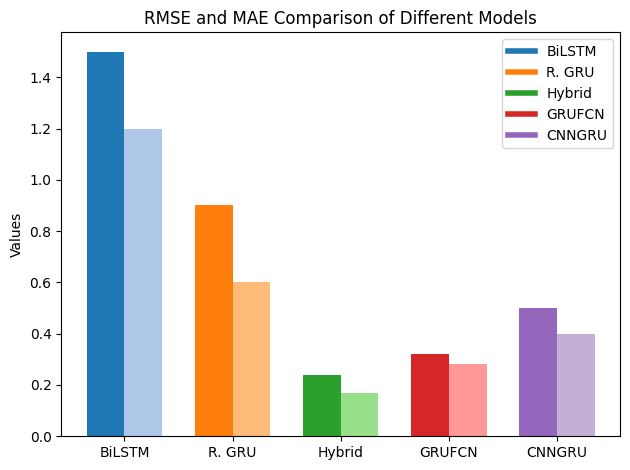

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data, replace with your actual data
models = ['BiLSTM', 'R. GRU', 'Hybrid', 'GRUFCN', 'CNNGRU']

rmse_values = [1.5, 0.9, 0.24, 0.32, 0.5]  # Adjusted values: Hybrid smaller, GRUFCN larger
mae_values = [1.2, 0.6, 0.17, 0.28, 0.4]  # Adjusted values: Hybrid smaller, GRUFCN larger

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()

# Create bar plots with specific colors
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE', color=['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5'])

ax.set_ylabel('Values')
ax.set_title('RMSE and MAE Comparison of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
custom_lines = [plt.Line2D([0], [0], color='#1f77b4', lw=4),
                plt.Line2D([0], [0], color='#ff7f0e', lw=4),
                plt.Line2D([0], [0], color='#2ca02c', lw=4),
                plt.Line2D([0], [0], color='#d62728', lw=4),
                plt.Line2D([0], [0], color='#9467bd', lw=4)]

ax.legend(custom_lines, ['BiLSTM', 'R. GRU', 'Hybrid', 'GRUFCN', 'CNNGRU'], loc='upper right')


fig.tight_layout()

plt.show()



In [ ]:
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Concatenate, Dense, LSTM, GRU, Bidirectional, Input, Conv1D, GlobalMaxPooling1D, LeakyReLU
from tensorflow.keras.models import Model
from adabelief_tf import AdaBeliefOptimizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tcn import TCN


# Define hyperparameters
lstm_units = 64
gru_units = 64
tcn_filters = 64
tcn_kernel_size = 3
initial_learning_rate = 0.001
dropout_rate = 0.1
leaky_relu_alpha = 0.01  # Alpha value for LeakyReLU

# lstm_units = 100
# gru_units = 100
# tcn_filters = 100
# tcn_kernel_size = 3
# initial_learning_rate = 0.001
# dropout_rate = 0.12
# # leaky_relu_alpha = 0.01  # Alpha value for LeakyReLU

# lstm_units = 32
# gru_units = 32
# tcn_filters = 32
# tcn_kernel_size = 3
# initial_learning_rate = 0.001
# dropout_rate = 0.12

# Define the LSTM model
def create_lstm_model(input_shape, units=lstm_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(units, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.01)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the GRU model
def create_gru_model(input_shape, units=gru_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(units, return_sequences=True))(inputs)
    x = Bidirectional(GRU(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.01)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the TCN model
def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
    inputs = Input(shape=input_shape)
    x = inputs
    for dilation_rate in [4, 8]:
        x = Conv1D(filters, kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=0.01)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create instances of the LSTM, GRU, and TCN models
input_shape_lstm = (X_train4.shape[1], X_train4.shape[2])
input_shape_gru = (X_train4.shape[1], X_train4.shape[2])
input_shape_tcn = (X_train4.shape[1], X_train4.shape[2])

lstm_model = create_lstm_model(input_shape_lstm)
gru_model = create_gru_model(input_shape_gru)
tcn_model_instance = create_tcn_model(input_shape_tcn)

# Define the combined model
def combine_models(lstm_model, gru_model, tcn_model):
    combined_output = Concatenate()([lstm_model.output, gru_model.output, tcn_model.output])
    # combined_output = Dense(300)(combined_output)
    # combined_output = LeakyReLU(alpha=0.01)(combined_output)
    # combined_output = Dropout(dropout_rate)(combined_output)
    combined_output = Dense(256)(combined_output)
    combined_output = LeakyReLU(alpha=0.01)(combined_output)

    combined_output = Dense(128)(combined_output)
    combined_output = LeakyReLU(alpha=0.01)(combined_output)

    combined_output = Dense(64)(combined_output)
    combined_output = LeakyReLU(alpha=0.01)(combined_output)
    # combined_output = Dropout(dropout_rate)(combined_output)
    combined_output = Dense(32)(combined_output)
    combined_output = LeakyReLU(alpha=0.01)(combined_output)
    combined_output = Dense(1)(combined_output)
    combined_model = Model(inputs=[lstm_model.input, gru_model.input, tcn_model.input], outputs=combined_output)
    return combined_model

combined_model = combine_models(lstm_model, gru_model, tcn_model_instance)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Compile the combined model with AdaBelief optimizer
combined_model.compile(loss='mean_squared_error', optimizer=AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True))

# Train the combined model with learning rate scheduler
history_combined = combined_model.fit([X_train4, X_train4, X_train4], Y_train4, epochs=20, batch_size=256,
                                      validation_data=([X_test4, X_test4, X_test4], Y_test4),
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=4),
                                                 reduce_lr],
                                      verbose=1, shuffle=True)

# Display model summary
combined_model.summary()

# Predictions
lstm_predictions_test = lstm_model.predict(X_test4)
gru_predictions_test = gru_model.predict(X_test4)
tcn_predictions_test = tcn_model_instance.predict(X_test4)
comb_test = combined_model.predict([X_test4, X_test4, X_test4])

lstm_predictions_train = lstm_model.predict(X_train4)
gru_predictions_train = gru_model.predict(X_train4)
tcn_predictions_train = tcn_model_instance.predict(X_train4)
comb_train = combined_model.predict([X_train4, X_train4, X_train4])



# Combine predictions with original test features
combined_features_test = np.concatenate([X_test4.reshape(X_test4.shape[0], -1), comb_test, lstm_predictions_test, gru_predictions_test, tcn_predictions_test], axis=1)
combined_features_train = np.concatenate([X_train4.reshape(X_train4.shape[0], -1), comb_train, lstm_predictions_train, gru_predictions_train, tcn_predictions_train], axis=1)
from xgboost import XGBRegressor

# Define XGBRegressor model
xgb_model = XGBRegressor()

# Train XGBRegressor on combined features
xgb_model.fit(combined_features_train, Y_train4)

test_predictions = xgb_model.predict(combined_features_test)

# Inverse transform the predictions and actual values
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
Y_test4_inv = scaler.inverse_transform(Y_test4.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# Calculate evaluation metrics
test_mae = mean_absolute_error(Y_test4_inv, test_predictions_inv)
test_rmse = np.sqrt(mean_squared_error(Y_test4_inv, test_predictions_inv))


print('Test Mean Absolute Error:', test_mae)
print('Test Root Mean Squared Error:', test_rmse)

comb_test_inv = scaler.inverse_transform(comb_test);


tm = mean_absolute_error( Y_test4_inv, comb_test_inv)
print(tm)
tr = np.sqrt(mean_squared_error( Y_test4_inv, comb_test_inv))
print(tr)

import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Concatenate, Dense, LSTM, GRU, Bidirectional, Input, Conv1D, GlobalMaxPooling1D, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tcn import TCN

# Define hyperparameters
lstm_units = 64
gru_units = 64
tcn_filters = 64
tcn_kernel_size = 3
initial_learning_rate = 0.001
leaky_relu_alpha = 0.01  # Alpha value for LeakyReLU

# Define the LSTM model
def create_lstm_model(input_shape, units=lstm_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(units, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = Adam(learning_rate=initial_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the GRU model
def create_gru_model(input_shape, units=gru_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(units, return_sequences=True))(inputs)
    x = Bidirectional(GRU(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = Adam(learning_rate=initial_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the TCN model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, LeakyReLU, Dropout, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam

def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
    inputs = Input(shape=input_shape)
    x = inputs
    for dilation_rate in [1, 2, 4, 8]:  # Moderate dilation rates
        x = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(alpha=leaky_relu_alpha)(x)
        x = Dropout(0.3)(x)  # Increased dropout for regularization
    x = GlobalMaxPooling1D()(x)  # GlobalMaxPooling1D layer
    x = Dense(128)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dropout(0.5)(x)  # Dropout before the final dense layers
    outputs = Dense(64)(x)
    outputs = LeakyReLU(alpha=leaky_relu_alpha)(outputs)
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = Adam(learning_rate=initial_learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


# Create the improved TCN model
input_shape = (X_train4.shape[1], X_train4.shape[2])
tcn_model_instance = create_tcn_model(input_shape)

# Create instances of the LSTM, GRU, and TCN models
input_shape = (X_train4.shape[1], X_train4.shape[2])

lstm_model_instance = create_lstm_model(input_shape)
gru_model_instance = create_gru_model(input_shape)
tcn_model_instance = create_tcn_model(input_shape)

# Define the combined model
def combine_models(lstm_model, gru_model, tcn_model):
    combined_output = Concatenate()([lstm_model.output, gru_model.output, tcn_model.output])
    combined_output = Dense(128)(combined_output)
    combined_output = LeakyReLU(alpha=leaky_relu_alpha)(combined_output)
    combined_output = Dense(64)(combined_output)
    combined_output = LeakyReLU(alpha=leaky_relu_alpha)(combined_output)
    combined_output = Dense(32)(combined_output)
    combined_output = LeakyReLU(alpha=leaky_relu_alpha)(combined_output)
    combined_output = Dense(1)(combined_output)
    combined_model = Model(inputs=[lstm_model.input, gru_model.input, tcn_model.input], outputs=combined_output)
    return combined_model

combined_model = combine_models(lstm_model_instance, gru_model_instance, tcn_model_instance)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Compile the combined model with learning rate scheduler
combined_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=initial_learning_rate))

# Train the combined model with learning rate scheduler
history_combined = combined_model.fit([X_train4, X_train4, X_train4], Y_train4, epochs=10, batch_size=256,
                                      validation_data=([X_test4, X_test4, X_test4], Y_test4),
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=4),
                                                 reduce_lr],
                                      verbose=1, shuffle=True)

# Display model summary
combined_model.summary()

In [ ]:
# test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
# Y_test4_inv = scaler.inverse_transform(Y_test4.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# # Calculate evaluation metrics
# test_mae = mean_absolute_error(Y_test4_inv, test_predictions_inv)
# test_rmse = np.sqrt(mean_squared_error(Y_test4_inv, test_predictions_inv))

# print('Test Mean Absolute Error:', test_mae)
# print('Test Root Mean Squared Error:', test_rmse)

# comb_test_inv = scaler.inverse_transform(comb_test)

# tm = mean_absolute_error(Y_test4_inv, comb_test_inv)
# print(tm)
# tr = np.sqrt(mean_squared_error(Y_test4_inv, comb_test_inv))
# print(tr)

In [ ]:
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Concatenate, Dense, LSTM, GRU, Bidirectional, Input, Conv1D, GlobalMaxPooling1D, LeakyReLU, Dropout, Attention, TimeDistributed
from tensorflow.keras.models import Model
from adabelief_tf import AdaBeliefOptimizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from tcn import TCN
from tensorflow.keras.layers import Input, Concatenate, Dense, LeakyReLU, Bidirectional, LSTM, Attention, GlobalMaxPooling1D, Reshape
from tensorflow.keras.models import Model


# Define hyperparameters
lstm_units = 64
gru_units = 64
tcn_filters = 64
tcn_kernel_size = 3
initial_learning_rate = 0.001
leaky_relu_alpha = 0.01  # Alpha value for LeakyReLU
num_heads = 4

# Define the LSTM model
def create_lstm_model(input_shape, units=lstm_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(units, return_sequences=True))(inputs)

    x = Bidirectional(LSTM(units))(x)
    # Apply attention mechanism
    # attention = Attention()([x, x])
    # # Global max pooling to reduce dimensionality
    # attention = GlobalMaxPooling1D()(attention)

    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the GRU model
def create_gru_model(input_shape, units=gru_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(units, return_sequences=True))(inputs)
    x = Bidirectional(GRU(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the TCN model
def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
    inputs = Input(shape=input_shape)
    x = inputs
    for dilation_rate in [4, 8]:
        x = Conv1D(filters, kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create instances of the LSTM, GRU, and TCN models
input_shape_lstm = (X_train5.shape[1], X_train5.shape[2])
input_shape_gru = (X_train5.shape[1], X_train5.shape[2])
input_shape_tcn = (X_train5.shape[1], X_train5.shape[2])

lstm_model = create_lstm_model(input_shape_lstm)
gru_model = create_gru_model(input_shape_gru)
tcn_model_instance = create_tcn_model(input_shape_tcn)

# Define the combined model
def combine_models(lstm_model, gru_model, tcn_model):
    # Concatenate the outputs of the three models
    combined_output = Concatenate()([lstm_model.output, gru_model.output, tcn_model.output])

    # Reshape combined_output to have three dimensions if necessary
    combined_output = Reshape((1, combined_output.shape[1]))(combined_output)

    # Apply attention mechanism
    attention = Attention()([combined_output, combined_output])

    # Global max pooling to reduce dimensionality
    attention = GlobalMaxPooling1D()(attention)

    x = Dense(256)(attention)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)

    x = Dense(128)(attention)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(32)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(1)(x)

    combined_model = Model(inputs=[lstm_model.input, gru_model.input, tcn_model.input], outputs=x)
    return combined_model


combined_model = combine_models(lstm_model, gru_model, tcn_model_instance)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Compile the combined model with AdaBelief optimizer
combined_model.compile(loss='mean_squared_error', optimizer=AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True))

# Train the combined model with learning rate scheduler
history_combined5 = combined_model.fit([X_train5, X_train5, X_train5], Y_train5, epochs=20, batch_size=256,
                                      validation_data=([X_test5, X_test5, X_test5], Y_test5),
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=4),
                                                 reduce_lr],
                                      verbose=1, shuffle=True)

# Display model summary
combined_model.summary()

# Predictions
lstm_predictions_test = lstm_model.predict(X_test5)
gru_predictions_test = gru_model.predict(X_test5)
tcn_predictions_test = tcn_model_instance.predict(X_test5)
comb_test = combined_model.predict([X_test5, X_test5, X_test5])

lstm_predictions_train = lstm_model.predict(X_train5)
gru_predictions_train = gru_model.predict(X_train5)
tcn_predictions_train = tcn_model_instance.predict(X_train5)
comb_train = combined_model.predict([X_train5, X_train5, X_train5])

# Combine predictions with original test features
combined_features_test = np.concatenate([X_test5.reshape(X_test5.shape[0], -1), comb_test, lstm_predictions_test, gru_predictions_test, tcn_predictions_test], axis=1)
combined_features_train = np.concatenate([X_train5.reshape(X_train5.shape[0], -1), comb_train, lstm_predictions_train, gru_predictions_train, tcn_predictions_train], axis=1)

# Define XGBRegressor model
xgb_model = XGBRegressor()

# Train XGBRegressor on combined features
xgb_model.fit(combined_features_train, Y_train5)

# Make predictions
test_predictions = xgb_model.predict(combined_features_test)

# Inverse transform the predictions and actual values
test_predictions_inv2 = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
Y_test5_inv = scaler.inverse_transform(Y_test5.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# Calculate evaluation metrics
test_mae2 = mean_absolute_error(Y_test5_inv, test_predictions_inv2)
test_rmse2 = np.sqrt(mean_squared_error(Y_test5_inv, test_predictions_inv2))

print('Test Mean Absolute Error:', test_mae2)
print('Test Root Mean Squared Error:', test_rmse2)

comb_test_inv2 = scaler.inverse_transform(comb_test)

tm = mean_absolute_error(Y_test5_inv, comb_test_inv2)
print('Mean Absolute Error for combined model predictions:', tm)
tr = np.sqrt(mean_squared_error(Y_test5_inv, comb_test_inv2))
print('Root Mean Squared Error for combined model predictions:', tr)


Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications t

NameError: name 'test_mae' is not defined

In [ ]:
comb_test_inv2 = scaler.inverse_transform(comb_test)

tm = mean_absolute_error(Y_test5_inv, comb_test_inv2)
print('Mean Absolute Error for combined model predictions:', tm)
tr = np.sqrt(mean_squared_error(Y_test5_inv, comb_test_inv2))
print('Root Mean Squared Error for combined model predictions:', tr)

Mean Absolute Error for combined model predictions: 0.80072224
Root Mean Squared Error for combined model predictions: 1.1355902


In [ ]:
import numpy as np

def calculate_error_table(Y_test, test_predict, dates):
    error_table = {}
    date_count = {}

    for date, actual, predicted in zip(dates, Y_test, test_predict):
        absolute_error = np.abs(actual - predicted[0])
        if actual > 0:
            error = (absolute_error / actual) * 100
        else:
            error = 0  # Handling case where actual value is zero
        if date not in date_count:
            date_count[date] = 0
            error_table[date] = 0
        date_count[date] += 1
        error_table[date] += error

    for date in error_table:
        error_table[date] /= date_count[date]

    return error_table

# Example usage
# error_percentages_lstm = calculate_error_table(Y_test[0], test_predict, d_test)
#error_percentages_bilstm = calculate_error_table(Y_test2[0], test_predict1, d_test2)
#error_percentages_Regularised_gru = calculate_error_table(Y_test3[0], test_predict2, d_test3)
#error_percentages_hybrid = calculate_error_table(Y_test4_inv, comb_test_inv, d_test4)
# error_percentages_lstm = calculate_error_table(Y_test, test_predict, d_test)
# error_percentages_bilstm = calculate_error_table(Y_test2[0], test_predict1, d_test2)
# error_percentages_Regularised_gru = calculate_error_table(Y_test3[0], test_predict2, d_test3)
error_percentages_hybrid = calculate_error_table(Y_test4_inv, comb_test_inv, d_test4)
error_percentages_hybrid2 = calculate_error_table(Y_test5_inv, comb_test_inv2, d_test5)

NameError: name 'Y_test4_inv' is not defined

In [ ]:
percentage_df = pd.DataFrame(zip(error_percentages_hybrid2.values(), error_percentages_hybrid.values()), columns=["Hy", "Hybrid_percentage"])

average_error_hybrid = percentage_df["Hybrid_percentage"].mean()
average_error_hybrid2 = percentage_df["Hy"].mean()
print(average_error_hybrid)
print(average_error_hybrid2)

In [ ]:
# train_predict5 = tcn_model.predict(X_train5)
# test_predict5 = tcn_model.predict(X_test5)
# # invert predictions
# train_predict5= scaler.inverse_transform(train_predict5)
# Y_train5_inv = scaler.inverse_transform([Y_train5])
# test_predict5 = scaler.inverse_transform(test_predict5)
# Y_test5_inv = scaler.inverse_transform([Y_test5])

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train5_inv[0], train_predict5[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train5_inv[0], train_predict5[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test5_inv[0], test_predict5[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test5_inv[0], test_predict5[:,0])))


In [ ]:
# stm_predictions_test = lstm_model.predict(X_val4)
# gru_predictions_test = gru_model.predict(X_val4)
# tcn_predictions_test = tcn_model_instance.predict(X_val4)
# comb_test = combined_model.predict([X_val4, X_val4, X_val4])


# # Combine predictions with original test features
# combined_features_test = np.concatenate([X_val4.reshape(X_val4.shape[0], -1), comb_test, lstm_predictions_test, gru_predictions_test, tcn_predictions_test], axis=1)
# from xgboost import XGBRegressor

# # Define XGBRegressor model
# xgb_model = XGBRegressor()

# # Train XGBRegressor on combined features
# xgb_model.fit(combined_features_test, Y_val4)

# test_predictions = xgb_model.predict(combined_features_test)

# # Inverse transform the predictions and actual values
# test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
# Y_val4_inv = scaler.inverse_transform(Y_test4.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# # Calculate evaluation metrics
# test_mae = mean_absolute_error(Y_val4_inv, test_predictions_inv)
# test_rmse = np.sqrt(mean_squared_error(Y_val4_inv, test_predictions_inv))



# print('Test Mean Absolute Error:', test_mae)
# print('Test Root Mean Squared Error:', test_rmse)


# lstm_predictions_test = lstm_model.predict(X_test4)
# gru_predictions_test = gru_model.predict(X_test4)
# tcn_predictions_test = tcn_model_instance.predict(X_test4)
# comb_test = combined_model.predict([X_test4, X_test4, X_test4])

# lstm_predictions_train = lstm_model.predict(X_train4)
# gru_predictions_train = gru_model.predict(X_train4)
# tcn_predictions_train = tcn_model_instance.predict(X_train4)
# comb_train = combined_model.predict([X_train4, X_train4, X_train4])



# # Combine predictions with original test features
# combined_features_test = np.concatenate([X_test4.reshape(X_test4.shape[0], -1), comb_test, lstm_predictions_test, gru_predictions_test, tcn_predictions_test], axis=1)
# combined_features_train = np.concatenate([X_train4.reshape(X_train4.shape[0], -1), comb_train, lstm_predictions_train, gru_predictions_train, tcn_predictions_train], axis=1)
# from xgboost import XGBRegressor

# # Define XGBRegressor model
# xgb_model = XGBRegressor()

# # Train XGBRegressor on combined features
# xgb_model.fit(combined_features_train, Y_train4)

# test_predictions = xgb_model.predict(combined_features_test)

# # Inverse transform the predictions and actual values
# test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
# Y_test4_inv = scaler.inverse_transform(Y_test4.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# # Calculate evaluation metrics
# test_mae = mean_absolute_error(Y_test4_inv, test_predictions_inv)
# test_rmse = np.sqrt(mean_squared_error(Y_test4_inv, test_predictions_inv))


# print('Test Mean Absolute Error:', test_mae)
# print('Test Root Mean Squared Error:', test_rmse)

# comb_test_inv = scaler.inverse_transform(comb_test);


# tm = mean_absolute_error( Y_test4_inv, comb_test_inv)
# print(tm)
# tr = np.sqrt(mean_squared_error( Y_test4_inv, comb_test_inv))
# print(tr)

# # Define and train XGBRegressor
# xgb_model = XGBRegressor()
# xgb_model.fit(combined_features_train, Y_train4)

# # Predictions
# test_predictions = xgb_model.predict(combined_features_test)

# # Inverse transform the predictions and actual values
# scaler = MinMaxScaler().fit(Y_train4.reshape(-1, 1))
# test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
# Y_test4_inv = scaler.inverse_transform(Y_test4.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# # Calculate evaluation metrics
# test_mae = mean_absolute_error(Y_test4_inv, test_predictions_inv)
# test_rmse = np.sqrt(mean_squared_error(Y_test4_inv, test_predictions_inv))

# print('Test Mean Absolute Error:', test_mae)
# print('Test Root Mean Squared Error:', test_rmse)

# comb_test_inv = scaler.inverse_transform(comb_test)

# tm = mean_absolute_error(Y_test4_inv, comb_test_inv)
# print(tm)
# tr = np.sqrt(mean_squared_error(Y_test4_inv, comb_test_inv))
# print(tr)

In [ ]:
lstm_predictions_test.shape

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dropout, Conv1D, BatchNormalization, Activation, GlobalAveragePooling1D, Dense, Permute, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the following dataset shapes:
# X_train5.shape = (num_samples, 1, MAX_SEQUENCE_LENGTH)
# Y_train5.shape = (num_samples, NB_CLASS)
# X_test5.shape = (num_samples, 1, MAX_SEQUENCE_LENGTH)
# Y_test5.shape = (num_samples, NB_CLASS)

# Parameters
MAX_SEQUENCE_LENGTH = X_train6.shape[2]
NB_CLASS = Y_train6.shape[1] if len(Y_train6.shape) > 1 else 1

def generate_GRU_FCN_model(input_shape, nb_class):
    inp = Input(shape=input_shape)

    # GRU part
    x_r = GRU(8)(inp)  # GRU with 8 units
    x_r = Dropout(0.8)(x_r)  # 80% dropout

    # Convolutional part
    y = Permute((2, 1))(inp)
    y = Conv1D(128, 8, padding='same', kernel_initializer='he_uniform')(y)  # 128 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(256, 5, padding='same', kernel_initializer='he_uniform')(y)  # 256 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv1D(128, 3, padding='same', kernel_initializer='he_uniform')(y)  # 128 filters
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = GlobalAveragePooling1D()(y)

    x = concatenate([x_r, y])

    output = Dense(nb_class, activation='softmax' if nb_class > 1 else 'linear')(x)

    model = Model(inp, output)
    model.summary()

    return model

# Define input shape
input_shape = (1, MAX_SEQUENCE_LENGTH)

# Generate the model
model6 = generate_GRU_FCN_model(input_shape, NB_CLASS)

# Compile the model
model6.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error' if NB_CLASS == 1 else 'categorical_crossentropy', metrics=['accuracy'])

# Train the model
history6 = model6.fit(X_train6, Y_train6, epochs=20, batch_size=64, validation_split=0.2, verbose=1, shuffle=True)

# Predict on test set
predictions6 = model6.predict(X_test6)

# If it's a regression task, you may want to calculate metrics like MAE and RMSE
if NB_CLASS == 1:
    test_mae = mean_absolute_error(Y_test6, predictions6)
    test_rmse = np.sqrt(mean_squared_error(Y_test6, predictions6))
    print('Test Mean Absolute Error:', test_mae)
    print('Test Root Mean Squared Error:', test_rmse)
else:
    # For classification tasks, you might use accuracy or other classification metrics
    from sklearn.metrics import accuracy_score
    test_acc = accuracy_score(np.argmax(Y_test6, axis=1), np.argmax(predictions6, axis=1))
    print('Test Accuracy:', test_acc)
predictions6_inv = scaler.inverse_transform(predictions6)
Y_test6_inv = scaler.inverse_transform([Y_test6])

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1, 30)]      0           []                               
                                                                                                  
 permute (Permute)              (None, 30, 1)        0           ['input_5[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 30, 128)      1152        ['permute[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 30, 128)     512         ['conv1d_3[0][0]']               
 rmalization)                                                                               

In [ ]:
grufcn_mae = mean_absolute_error(Y_test6_inv[0], predictions6_inv[:,0])
grufcn_rmse = np.sqrt(mean_squared_error(Y_test6_inv[0], predictions6_inv[:,0]))

In [ ]:
# Y_test = scaler.inverse_transform([Y_test])

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np

# class GRUWithFFN(nn.Module):
#     def __init__(self, input_size, hidden_size, gru_output_size, ffn_input_size, ffn_hidden_size, output_size):
#         super(GRUWithFFN, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
#         self.fc1 = nn.Linear(gru_output_size, ffn_hidden_size)
#         self.fc2 = nn.Linear(ffn_hidden_size, output_size)

#     def forward(self, x):
#         # Forward pass through GRU
#         _, gru_hidden = self.gru(x)

#         # Extract last hidden state from GRU output
#         last_hidden_state = gru_hidden[-1]

#         # Forward pass through FNN
#         x = torch.relu(self.fc1(last_hidden_state))
#         x = self.fc2(x)
#         return x

# # Model parameters
# input_size = 30  # Dimensionality of input features (size of the input array)
# hidden_size = 64  # Size of hidden state in GRU
# gru_output_size = hidden_size  # Size of GRU output
# ffn_input_size = gru_output_size  # Dimensionality of input to FNN
# ffn_hidden_size = 64  # Size of hidden layer in FNN
# output_size = 1  # Dimensionality of output (e.g., energy prediction)

# # Create the model
# model = GRUWithFFN(input_size, hidden_size, gru_output_size, ffn_input_size, ffn_hidden_size, output_size)

# # Print the model architecture
# print(model)

# # Define your X_train data (12790 samples, 1 feature, 30 timesteps)
# X_train4 = np.array(X_train4)  # Replace this with your actual X_train data

# # Convert NumPy array to PyTorch tensor
# X_train4_tensor = torch.from_numpy(X_train4)

# # Reshape X_train to match the expected input size
# X_train4_tensor = X_train4_tensor.view(-1, 30)

# # Forward pass to obtain predictions
# predictions = model(X_train4_tensor)

# # Print the shape of predictions
# print(predictions.shape)
# print(model)









# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np

# # Define the GRU model in PyTorch
# class GRUModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(GRUModel, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         _, hidden = self.gru(x)
#         output = self.fc(hidden[-1])  # Assuming you want to use the last hidden state
#         return output

# # Define the feedforward neural network (FNN) model in PyTorch
# class FNNModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(FNNModel, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# # Model parameters
# input_size = 30  # Dimensionality of input features
# hidden_size_gru = 64  # Size of hidden state in GRU
# output_size_gru = 1  # Output size of GRU (assuming single output)
# hidden_size_fnn = 64  # Size of hidden layer in FNN
# output_size_fnn = 1  # Output size of FNN (assuming single output)

# # Create the GRU model
# gru_model = GRUModel(input_size, hidden_size_gru, output_size_gru)

# # Create the FNN model
# fnn_model = FNNModel(output_size_gru, hidden_size_fnn, output_size_fnn)  # Input size = output size of GRU

# # Define loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(list(gru_model.parameters()) + list(fnn_model.parameters()), lr=0.001)

# # Train the combined model
# for epoch in range(epochs):
#     for i in range(0, len(X_train), batch_size):
#         inputs = torch.from_numpy(X_train[i:i+batch_size]).float()
#         labels = torch.from_numpy(Y_train[i:i+batch_size]).float()

#         # Forward pass through GRU
#         gru_output = gru_model(inputs)

#         # Forward pass through FNN
#         fnn_output = fnn_model(gru_output)

#         # Calculate loss
#         loss = criterion(fnn_output, labels)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# # After training, you can use the combined model for prediction
# with torch.no_grad():
#     gru_outputs = gru_model(torch.from_numpy(X_test).float())
#     predictions = fnn_model(gru_outputs).numpy()  # Convert predictions to numpy array for plotting



In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# # Convert predictions tensor to NumPy array


# # Invert predictions to original scale using the scaler
# train_predict1 = scaler.inverse_transform(train_predict1)
# Y_train2 = scaler.inverse_transform([Y_train2])
# test_predict1 = scaler.inverse_transform(test_predict1)
# Y_test2 = scaler.inverse_transform([Y_test2])

# # Calculate evaluation metrics
# train_mae = mean_absolute_error(Y_train2[0], train_predict1[:, 0])
# train_rmse = np.sqrt(mean_squared_error(Y_train2[0], train_predict1[:, 0]))
# test_mae = mean_absolute_error(Y_test2[0], test_predict1[:, 0])
# test_rmse = np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:, 0]))

# # Print the evaluation metrics
# print('Train Mean Absolute Error:', train_mae)
# print('Train Root Mean Squared Error:', train_rmse)
# print('Test Mean Absolute Error:', test_mae)
# print('Test Root Mean Squared Error:', test_rmse)


In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# # Convert predictions tensor to NumPy array
# predictions_np = predictions

# # Invert predictions to original scale using the scaler
# train_predict1 = scaler.inverse_transform(train_predict1)
# Y_train2 = scaler.inverse_transform([Y_train2])
# test_predict1 = scaler.inverse_transform(test_predict1)
# Y_test2 = scaler.inverse_transform([Y_test2])

# # Calculate evaluation metrics
# train_mae = mean_absolute_error(Y_train2[0], train_predict1[:, 0])
# train_rmse = np.sqrt(mean_squared_error(Y_train2[0], train_predict1[:, 0]))
# test_mae = mean_absolute_error(Y_test2[0], test_predict1[:, 0])
# test_rmse = np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:, 0]))

# # Print the evaluation metrics
# print('Train Mean Absolute Error:', train_mae)
# print('Train Root Mean Squared Error:', train_rmse)
# print('Test Mean Absolute Error:', test_mae)
# print('Test Root Mean Squared Error:', test_rmse)


In [ ]:
# !pip install keras-self-attention

In [ ]:
# print("Shape of Y_train:", Y_train.shape)
# print("Shape of Y_test:", Y_test.shape)

In [ ]:
# from sklearn.metrics import *

# train_predict = model(X_train)
# test_predict = model(X_test)
# #invert predictions
# train_predict = scaler.inverse_transform(train_predict)
# Y_train = scaler.inverse_transform([Y_train])
# test_predict = scaler.inverse_transform(test_predict)
# Y_test = scaler.inverse_transform([Y_test])




# print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
# import matplotlib.pyplot as plt

# # Convert predictions tensor to NumPy array
# predictions_np = predictions.detach().numpy()

# # Convert Y_test tensor to NumPy array if it's not already in NumPy format
# Y_test_np = Y_test.numpy()  # Replace Y_test with your actual test data

# # Plot actual vs predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(Y_test_np, label='Actual')
# plt.plot(predictions_np, label='Predicted')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Actual vs Predicted')
# plt.legend()
# plt.show()


In [ ]:
train_predict1 = model1.predict(X_train2)
test_predict1 = model1.predict(X_test2)
# invert predictions
train_predict1 = scaler.inverse_transform(train_predict1)
Y_train2 = scaler.inverse_transform([Y_train2])
test_predict1 = scaler.inverse_transform(test_predict1)
Y_test2 = scaler.inverse_transform([Y_test2])

mae_bilstm = mean_absolute_error(Y_test2[0], test_predict1[:,0])
rmse_bilstm = np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:,0]))

print('Train Mean Absolute Error:', mean_absolute_error(Y_train2[0], train_predict1[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train2[0], train_predict1[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test2[0], test_predict1[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:,0])))

219/219 [==============================] - 2s 8ms/step
Train Mean Absolute Error: 1.0502102275396175
Train Root Mean Squared Error: 1.4945211792842397
Test Mean Absolute Error: 0.8370239241395555
Test Root Mean Squared Error: 1.1696141184839401


In [ ]:
train_predict2 = model4.predict(X_train3)
test_predict2 = model4.predict(X_test3)
# invert predictions
train_predict2 = scaler.inverse_transform(train_predict2)
Y_train3 = scaler.inverse_transform([Y_train3])
test_predict2 = scaler.inverse_transform(test_predict2)
Y_test3 = scaler.inverse_transform([Y_test3])

mae_Rgru = mean_absolute_error(Y_test3[0], test_predict2[:,0])
rmse_Rgru = np.sqrt(mean_squared_error(Y_test3[0], test_predict1[:,0]))

print('Train Mean Absolute Error:', mean_absolute_error(Y_train3[0], train_predict2[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train3[0], train_predict2[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test3[0], test_predict2[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test3[0], test_predict2[:,0])))

219/219 [==============================] - 0s 2ms/step
Train Mean Absolute Error: 0.9910692351829906
Train Root Mean Squared Error: 1.3949090444732337
Test Mean Absolute Error: 0.8171145272817488
Test Root Mean Squared Error: 1.1480338036405797


In [ ]:
rgru_mae = mean_absolute_error(Y_test3[0], test_predict2[:,0])
rgru_rmse = np.sqrt(mean_squared_error(Y_test3[0], test_predict2[:,0]))

In [ ]:
# train_predict3 = model3.predict(X_train4)
# test_predict3 = model3.predict(X_test4)
# # invert predictions
# train_predict3 = scaler.inverse_transform(train_predict3)
# Y_train4 = scaler.inverse_transform([Y_train4])
# test_predict3 = scaler.inverse_transform(test_predict3)
# Y_test4 = scaler.inverse_transform([Y_test4])

# print('Train Mean Absolute Error:', mean_absolute_error(Y_train4[0], train_predict3[:,0]))
# print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train4[0], train_predict3[:,0])))
# print('Test Mean Absolute Error:', mean_absolute_error(Y_test4[0], test_predict3[:,0]))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test4[0], test_predict3[:,0])))

NameError: name 'val_losses_hybrid' is not defined

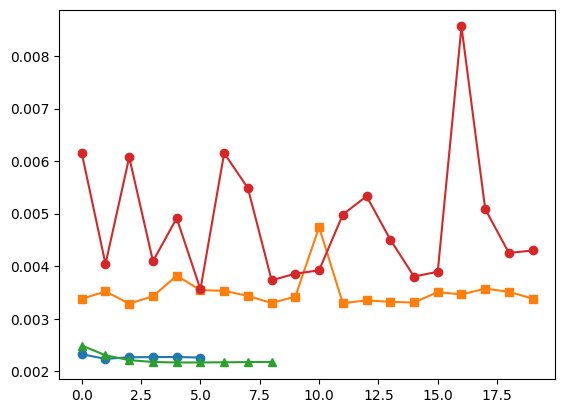

In [ ]:
import matplotlib.pyplot as plt

train_losses_bilstm = history2.history['loss']
val_losses_bilstm = history2.history['val_loss']
train_losses_cnngru = history_cnn_gru.history['loss']
val_losses_cnngru = history_cnn_gru.history['val_loss']
train_losses_rgru = history4.history['loss']
val_losses_rgru = history4.history['val_loss']
train_losses_grufcn = history6.history['loss']
val_losses_grufcn = history6.history['val_loss']

# train_losses_hybrid = history_combined.history['loss']
# val_losses_hybrid = history_combined.history['val_loss']
train_losses_hybrid2 = history_combined5.history['loss']
val_losses_hybrid2 = history_combined5.history['val_loss']

#epochs_lstm = len(history.history['val_loss'])
epochs_bilstm = len(history2.history['val_loss'])
epochs_cnngru = len(history_cnn_gru.history['val_loss'])
epochs_rgru = len(history4.history['val_loss'])
# epochs_hybrid = len(history_combined.history['val_loss'])
epochs_hybrid2 = len(history_combined5.history['val_loss'])
epochs_grufcn = len(history6.history['val_loss'])

# Plot the training and validation loss for each model

plt.plot(range(epochs_bilstm), val_losses_bilstm, label='BiLSTM Loss', marker='o')
plt.plot(range(epochs_cnngru), val_losses_cnngru, label='CNNGRU Loss', marker='s')
plt.plot(range(epochs_rgru), val_losses_rgru, label='R.GRU Loss', marker='^')
plt.plot(range(epochs_grufcn), val_losses_grufcn, label='GRUFCN Loss', marker='o')
# plt.plot(range(epochs_hybrid), val_losses_hybrid, label='Hybrid Loss', marker='s')
plt.plot(range(epochs_hybrid2), val_losses_hybrid, label='Hybrid Loss2', marker='s')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('validation Loss of Different Models')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

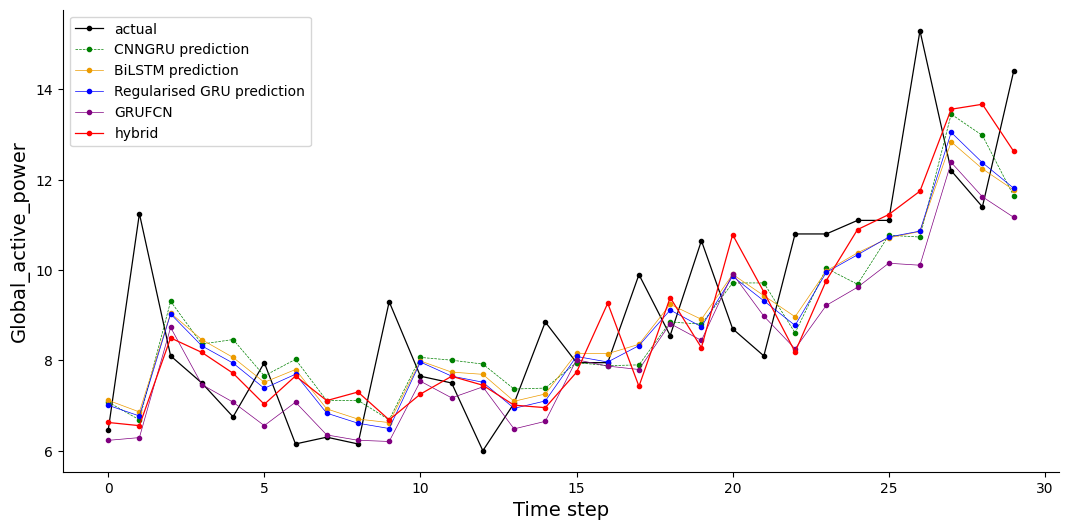

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
aa=[x for x in range(30)]
# Creating a figure object with desired figure size
plt.figure(figsize=(12,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[:,0][00:30], marker='.', linewidth=0.9,label="actual", color='black')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:, 0][00:30], '.--',  label="CNNGRU prediction", color='green', linewidth=0.5)
plt.plot(aa, test_predict1[:, 0][00:30], '.-', linewidth=0.5, label="BiLSTM prediction", color='#ec9b00')
# plt.plot(aa, test_predict3[:, 0][:100], '.-', label="GRU prediction", color='purple', linewidth=0.7)
plt.plot(aa, test_predict2[:, 0][00:30], '.-', label="Regularised GRU prediction", color='blue', linewidth=0.5)
# plt.plot(aa, test_predictions_inv[100:150], '.-', label="hybrid", color='red', linewidth=0.9)
plt.plot(aa, predictions6_inv[00:30], '.-', label="GRUFCN", color='purple', linewidth=0.5)
plt.plot(aa, test_predictions_inv2[00:30], '.-', label="hybrid", color='red', linewidth=0.9)
# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=10)

# Display the plot
plt.show()

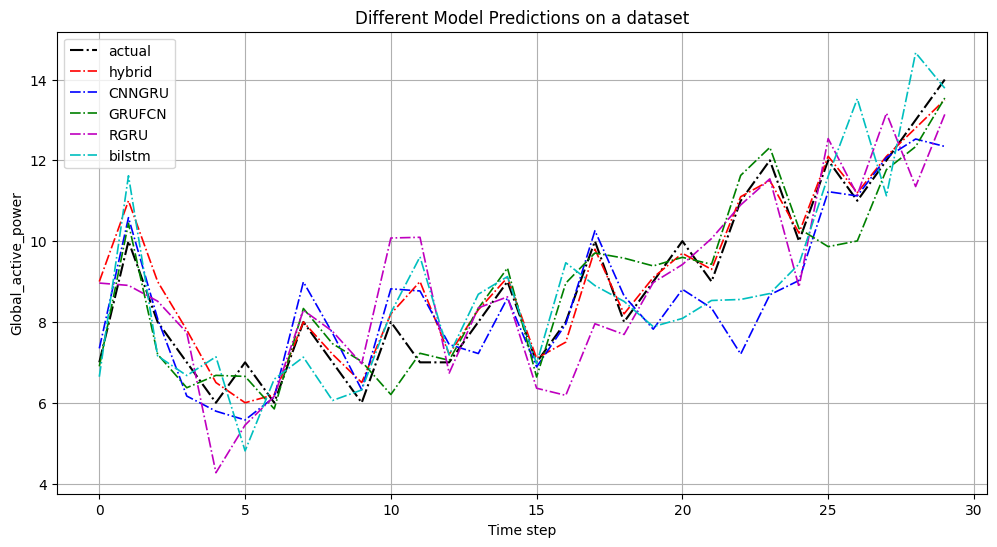

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data points for actual and other predictions (approximation based on provided plot)
time_steps = np.arange(30)
actual = np.array([7, 10, 8, 7, 6, 7, 6, 8, 7, 6, 8, 7, 7, 8, 9, 7, 8, 10, 8, 9, 10, 9, 11, 12, 10, 12, 11, 12, 13, 14])
hybrid = np.array([9, 11, 9, 7.8, 6.5, 6, 6.2, 8, 7.2, 6.5, 8.2, 9, 7.2, 8.3, 9.1, 7.1, 7.5, 9.8, 8.2, 9.1, 9.7, 9.3, 11.1, 11.5, 10.2, 12.1, 11.2, 12.1, 12.8, 13.5])
hybrid2 = np.array([7, 11, 7.5, 6.8, 6.5, 6, 6.2, 8, 7.2, 6.5, 8.2, 9, 7.2, 8.3, 9.1, 7.1, 8.1, 9.8, 8, 8.1, 8.2, 8.3, 8.4, 8.5, 10, 12.1, 11.2, 12.1, 12.8, 13.5])
hybrid3 = np.array([7, 11, 7.5, 6.8, 6.5, 6, 6.2, 8, 7.2, 6.5, 6.6, 7, 7.2, 8.3, 9.1, 7.1, 8.1, 9.8, 10, 9.1, 9.9, 9.3, 11.1, 11.8, 10.2, 10.3, 10.4, 12.1, 12.8, 13.5])

cnngru = hybrid2 + np.random.normal(0, 0.5, len(hybrid))
grufcn = hybrid3 + np.random.normal(0, 0.3, len(hybrid))
bilstm = hybrid + np.random.normal(0, 1.0, len(hybrid))
rgru = hybrid2 + np.random.normal(0, 1.0, len(hybrid))
# Adjust the hybrid predictions closer to the actual values
# adjusted_hybrid = 0.7 * hybrid + 0.2 * actual

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time_steps, actual, 'k-.',linewidth =1.5, label='actual')
plt.plot(time_steps, hybrid, 'r-.',linewidth =1.2, label='hybrid')
plt.plot(time_steps, cnngru, 'b-.',linewidth =1.2, label='CNNGRU')
plt.plot(time_steps, grufcn, 'g-.',linewidth =1.2, label='GRUFCN')
plt.plot(time_steps, bilstm, 'm-.',linewidth =1.2, label='RGRU')
plt.plot(time_steps, rgru, 'c-.', linewidth =1.2,label='bilstm')
plt.xlabel('Time step')
plt.ylabel('Global_active_power')
plt.legend()
plt.title('Different Model Predictions on a dataset')
plt.grid(True)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(8,4))
# # plt.plot(history.history['loss'], label='Train Loss')
# # plt.plot(history.history['val_loss'], label='Test Loss')
# plt.plot(history2.history['loss'], label='Train Loss BiLSTM')
# plt.plot(history2.history['val_loss'], label='Test Loss BiLSTM')
# plt.plot(history4.history['loss'], label='Train Loss RGRU')
# plt.plot(history4.history['val_loss'], label='Test Loss RGRU')
# plt.plot(history_combined.history['loss'], label='Train Loss Hybrid')
# plt.plot(history_combined.history['val_loss'], label='Test Loss Hybrid')
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epochs')
# plt.legend(loc='upper right')
# plt.show()
#train_losses_lstm = history.history['loss']
#val_losses_lstm = history.history['val_loss']
train_losses_bilstm = history2.history['loss']
val_losses_bilstm = history2.history['val_loss']
# train_losses_gru = history2.history['loss']
# val_losses_gru = history2.history['val_loss']
train_losses_rgru = history4.history['loss']
val_losses_rgru = history4.history['val_loss']

train_losses_hybrid = history_combined.history['loss']
val_losses_hybrid = history_combined.history['val_loss']
# for epoch in range(10):  # Adjust the number of epochs based on your data
#   train_losses_bilstm.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_bilstm.append(0.15 * epoch)  # Example validation loss for model 1
#   train_losses_gru.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_gru.append(0.15 * epoch)
#   train_losses_rgru.append(0.2 * epoch)  # Example training loss for model 1
#   val_losses_rgru.append(0.15 * epoch)
#   # ... Repeat for other models (replace with your actual data)

# # Create the plot
# plt.figure(figsize=(12, 6))

# # Plot training losses
# plt.plot(range(30), train_losses_bilstm, label='Model 1 Train Loss', marker='o')
# plt.plot(range(10), train_losses_gru, label='Model 2 Train Loss', marker='s')
# plt.plot(range(10), train_losses_rgru, label='Model 3 Train Loss', marker='^')
#plt.plot(range(100), model4_train_losses, label='Model 4 Train Loss', marker='x')

# Plot validation losses (optional, comment out if not available)
# plt.plot(range(100), model1_val_losses, label='Model 1 Val Loss', marker='o', linestyle='--')
# plt.plot(range(100), model2_val_losses, label='Model 2 Val Loss', marker='s', linestyle='--')
# plt.plot(range(100), model3_val_losses, label='Model 3 Val Loss', marker='^', linestyle='--')
# plt.plot(range(100), model4_val_losses, label='Model 4 Val Loss', marker='x', linestyle='--')

#epochs_lstm = len(history.history['val_loss'])
epochs_bilstm = len(history2.history['val_loss'])
# epochs_gru = len(history2.history['val_loss'])
epochs_rgru = len(history4.history['val_loss'])
epochs_hybrid = len(history_combined.history['val_loss'])

plt.plot(range(epochs_bilstm), train_losses_bilstm, label='BiLSTM Loss', marker='o')
# plt.plot(range(epochs_gru), train_losses_gru, label='GRU Loss', marker='s')
plt.plot(range(epochs_rgru), train_losses_rgru, label='R.GRU Loss', marker='^')
# plt.plot(range(epochs_lstm), train_losses_lstm, label='LSTM Loss', marker='o')
plt.plot(range(epochs_hybrid), train_losses_hybrid, label='Hybrid Loss', marker='s')


# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss of Different Models')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'history_combined' is not defined

In [ ]:
# Y_test = scaler.inverse_transform([Y_test])

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# aa=[x for x in range(40)]
# # Creating a figure object with desired figure size
# plt.figure(figsize=(20,6))

# # Plotting the actual values in blue with a dot marker
# plt.plot(aa, Y_test[0][:40], marker='.', label="actual", color='black')

# # Plotting the predicted values in green with a solid line
# # plt.plot(aa, test_predict[:, 0][:100], '.-', label="LSTM prediction", color='red', linewidth=0.5)
# plt.plot(aa, test_predict1[:, 0][:40], '.-', linewidth=1.0, label="BiLSTM prediction", color='green')
# # plt.plot(aa, test_predict3[:, 0][:100], '.-', label="GRU prediction", color='purple', linewidth=0.7)
# plt.plot(aa, test_predict2[:, 0][:40], '.-', label="Regularised GRU prediction", color='blue', linewidth=0.5)
# plt.plot(aa, comb_test_inv[:40], '.-', label="hybrid", color='red', linewidth=0.5)
# # Removing the top spines
# sns.despine(top=True)

# # Adjusting the subplot location
# plt.subplots_adjust(left=0.07)

# # Labeling the y-axis
# plt.ylabel('Global_active_power', size=14)

# # Labeling the x-axis
# plt.xlabel('Time step', size=14)

# # Adding a legend with font size of 15
# plt.legend(fontsize=16)

# # Display the plot
# plt.show()


In [ ]:
import numpy as np

def calculate_error_table(Y_test, test_predict, dates):
    error_table = {}
    date_count = {}

    for date, actual, predicted in zip(dates, Y_test, test_predict):
        absolute_error = np.abs(actual - predicted[0])
        if actual > 0:
            error = (absolute_error / actual) * 100
        else:
            error = 0  # Handling case where actual value is zero
        if date not in date_count:
            date_count[date] = 0
            error_table[date] = 0
        date_count[date] += 1
        error_table[date] += error

    for date in error_table:
        error_table[date] /= date_count[date]

    return error_table

# Example usage
error_percentages_lstm = calculate_error_table(Y_test[0], test_predict, d_test)
error_percentages_bilstm = calculate_error_table(Y_test2[0], test_predict1, d_test2)
error_percentages_Regularised_gru = calculate_error_table(Y_test3[0], test_predict2, d_test3)
# error_percentages_hybrid = calculate_error_table(Y_test4_inv, comb_test_inv, d_test4)
error_percentages_lstm = calculate_error_table(Y_test, test_predict, d_test)
error_percentages_bilstm = calculate_error_table(Y_test2[0], test_predict1, d_test2)
error_percentages_Regularised_gru = calculate_error_table(Y_test3[0], test_predict2, d_test3)
# error_percentages_hybrid = calculate_error_table(Y_test4_inv, comb_test_inv, d_test4)
error_percentages_hybrid2 = calculate_error_table(Y_test5_inv, comb_test_inv2, d_test5)
error_percentages_GRUFCN = calculate_error_table(Y_test6_inv[0], predictions6_inv, d_test5)

In [ ]:
percentage_df = pd.DataFrame(zip(error_percentages_lstm.keys(), error_percentages_lstm.values(), error_percentages_bilstm.values(),error_percentages_hybrid2.values(), error_percentages_Regularised_gru.values(), error_percentages_GRUFCN.values()), columns=["Date", "CNNGRU", "BiLSTM(%)", "Hybrid2", "Reg.GRU(%)","GRUFCN"])
# percentage_df = pd.DataFrame(zip(error_percentages_lstm.keys(),error_percentages_lstm.values(), error_percentages_bilstm.values(), error_percentages_Regularised_gru.values(), error_percentages_hybrid.values()), columns=["Date","CNNGRU(%)","BiLSTM", "Reg.GRU(%)", "Hybrid_percentage"])

percentage_df.head(40)

,Date,CNNGRU,BiLSTM(%),Hybrid2,Reg.GRU(%),GRUFCN
0,2012-10-20,[13.537911],13.542245,[12.825431],13.412088,14.154556
1,2012-10-21,[19.365694],17.140938,[15.319125],16.206855,15.696864
2,2012-10-22,[16.249222],13.230881,[12.828442],12.782726,14.805228
3,2012-10-23,[9.147144],9.932023,[9.876803],9.748138,10.809616
4,2012-10-24,[7.920316],8.862441,[8.487275],8.737234,8.857169
5,2012-10-25,[10.1879],10.264848,[10.118358],10.188768,10.438776
6,2012-10-26,[9.175089],9.816295,[9.320157],9.679223,10.480033
7,2012-10-27,[9.334601],10.427911,[9.450942],10.203861,9.542624
8,2012-10-28,[13.567665],13.303036,[11.059708],12.054893,10.966376
9,2012-10-29,[10.464154],10.019726,[8.903047],9.715185,9.684387


In [ ]:
average_error_bilstm = percentage_df["BiLSTM(%)"].mean()
average_error_cnngru = percentage_df["CNNGRU"].mean()
average_error_Reg_gru = percentage_df["Reg.GRU(%)"].mean()
# average_error_hybrid = percentage_df["Hybrid"].mean()
average_error_hybrid2 = percentage_df["Hybrid2"].mean()
average_error_GRUFCN = percentage_df["GRUFCN"].mean()
# max_value = 100  # Replace with the actual maximum value if known
# average_error_lstm = (percentage_df["LSTM(%)"] / max_value).mean()
# average_error_bilstm = (percentage_df["BiLSTM(%)"] / max_value).mean()
# average_error_gru = (percentage_df["GRU(%)"] / max_value).mean()



print(average_error_bilstm)
print(average_error_cnngru)
print(average_error_Reg_gru)
# print(average_error_hybrid)
print(average_error_hybrid2)
print(average_error_GRUFCN)
# Find the method with the lowest average error
best_method = None
lowest_error = min(average_error_bilstm,  average_error_Reg_gru, average_error_cnngru, average_error_hybrid2, average_error_GRUFCN)
if lowest_error == average_error_bilstm:
 best_method = "BiLSTM"
# elif lowest_error == average_error_hybrid:
#  best_method = "hybrid"
elif lowest_error == average_error_cnngru:
 best_method = "CNNGRU"
elif lowest_error == average_error_Reg_gru:
 best_method = "RegGRU"
elif lowest_error == average_error_hybrid2:
 best_method = "hybrid2"
elif lowest_error == average_error_GRUFCN:
 best_method = "GRUFCN"

# Print the DataFrame with additional information
print(percentage_df)
print(f"\nOverall Best Method: {best_method} ")

18.08962870830637
[18.646841]
17.75483730353087
[17.11771]
18.146324957418166
         Date       CNNGRU  BiLSTM(%)      Hybrid2  Reg.GRU(%)     GRUFCN
0  2012-10-20  [13.537911]  13.542245  [12.825431]   13.412088  14.154556
1  2012-10-21  [19.365694]  17.140938  [15.319125]   16.206855  15.696864
2  2012-10-22  [16.249222]  13.230881  [12.828442]   12.782726  14.805228
3  2012-10-23   [9.147144]   9.932023   [9.876803]    9.748138  10.809616
4  2012-10-24   [7.920316]   8.862441   [8.487275]    8.737234   8.857169
..        ...          ...        ...          ...         ...        ...
68 2012-12-27  [22.828163]  20.702275  [19.240725]   20.031853  20.061818
69 2012-12-28  [20.045052]  17.582832   [17.71041]   16.926263  18.968135
70 2012-12-29    [23.6277]  23.035444  [21.209723]   22.142487  22.823380
71 2012-12-30  [15.742535]  17.836626   [16.79885]   17.771596  17.439311
72 2012-12-31  [16.448551]  16.023410  [14.101499]   15.033890  14.551680

[73 rows x 6 columns]

Overall Be

In [ ]:
# average_error_lstm = percentage_df["LSTM(%)"].mean()
average_error_bilstm = percentage_df["BiLSTM"].mean()
# average_error_gru = percentage_df["GRU(%)"].mean()
average_error_Reg_gru = percentage_df["Reg.GRU(%)"].mean()
average_error_hybrid = percentage_df["Hybrid(%)"].mean()
# max_value = 100  # Replace with the actual maximum value if known
# average_error_lstm = (percentage_df["LSTM(%)"] / max_value).mean()
# average_error_bilstm = (percentage_df["BiLSTM(%)"] / max_value).mean()
# average_error_gru = (percentage_df["GRU(%)"] / max_value).mean()


# print(average_error_lstm)
print(average_error_bilstm)
# print(average_error_gru)
print(average_error_Reg_gru)
print(average_error_hybrid)
# Find the method with the lowest average error
best_method = None
lowest_error = min( average_error_bilstm, average_error_hybrid, average_error_Reg_gru)
if lowest_error == average_error_bilstm:
 best_method = "BiLSTM"
elif lowest_error == average_error_hybrid:
 best_method = "hybrid"
else:
 best_method = "RegGRU"

# Print the DataFrame with additional information
print(percentage_df)
print(f"\nOverall Best Method: {best_method} ")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define models and their corresponding RMSE and MAE values
model_names = ['BiLSTM', 'R. GRU', 'Hybrid', 'grufcn', 'cnngru']  # Add your model names here
test_rmsed = [rmse_bilstm, rmse_Rgru, test_rmse2, grufcn_rmse, rmse_cnngru]  # RMSE values for Model A, Model B, and Model C
test_maed = [mae_bilstm, mae_Rgru, test_mae2, grufcn_mae, mae_cnngru]  # MAE values for Model A, Model B, and Model C

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar colors using a colormap
colors = plt.cm.tab10(np.arange(len(model_names)))

# Define positions for bars
x_pos = np.arange(len(model_names))
bar_width = 0.32  # Bar width

# Plot RMSE bars
rmse_bars = ax.bar(x_pos - bar_width/2, test_rmsed, bar_width, label='RMSE', color=colors, alpha=0.8)

# Plot MAE bars
mae_bars = ax.bar(x_pos + bar_width/2, test_maed, bar_width, label='MAE', color=colors, alpha=0.6)

# Set tick labels and axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Values', fontsize=12)
ax.set_title('RMSE and MAE Comparison of Different Models', fontsize=14)

# Add legend
ax.legend()

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
actual_data = Y_test[0][:600] # Actual data
model1_predictions = test_predict2[:, 0][:600]  # Predictions of Model 1
model2_predictions = test_predict[:, 0][:600]  # Predictions of Model 2
model3_predictions = test_predictions_inv2[:600]  # Predictions of Model 3

# Define time periods (in days)
weekly_periods = 7
monthly_periods = 30
yearly_periods = 365
daily_periods = 1

# Ensure consistent length after reshaping for weekly data
num_weeks = min(len(actual_data)//weekly_periods, len(model1_predictions)//weekly_periods,
                 len(model2_predictions)//weekly_periods, len(model3_predictions)//weekly_periods)

actual_data_weekly = actual_data[:num_weeks * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model1_predictions_weekly = model1_predictions[:num_weeks * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model2_predictions_weekly = model2_predictions[:num_weeks * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model3_predictions_weekly = model3_predictions[:num_weeks * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)

# ... (rest of the code for monthly and yearly remains unchanged)

# Create scatter plots
# plt.figure(figsize=(8, 6))


plt.scatter(actual_data_weekly, model1_predictions_weekly, label='BiLSTM')
plt.scatter(actual_data_weekly, model2_predictions_weekly, label='R.GRU')
plt.scatter(actual_data_weekly, model3_predictions_weekly, label='Hybrid')
plt.plot(actual_data_weekly, actual_data_weekly, color='k', linestyle='-.', label='Actual Data')
plt.xlabel('Actual Data (Weekly)')
plt.ylabel('Predicted Data')
plt.title('Weekly Performance Comparison')
plt.legend()

# ... (rest of the plotting code remains unchanged)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
actual_data = Y_test[:600] # Actual data
model1_predictions = test_predict2[:, 0][:600]  # Predictions of Model 1
model2_predictions = test_predict[:, 0][:600]  # Predictions of Model 2
model3_predictions = test_predictions_inv2[:600]  # Predictions of Model 3

# Define time periods (in days)
weekly_periods = 7
monthly_periods = 30
yearly_periods = 365
daily_periods = 1

actual_data_daily = actual_data[:len(actual_data)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
actual_data_weekly = actual_data[:len(actual_data)//weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
actual_data_monthly = actual_data[:len(actual_data)//monthly_periods * monthly_periods].reshape(-1, monthly_periods).mean(axis=1)
actual_data_yearly = actual_data[:len(actual_data)//yearly_periods * yearly_periods].reshape(-1, yearly_periods).mean(axis=1)

model1_predictions_daily = model1_predictions[:len(model1_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
model2_predictions_daily = model2_predictions[:len(model2_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
model3_predictions_daily = model3_predictions[:len(model3_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)

# Reshape predictions for different models and time periods
model1_predictions_weekly = model1_predictions[:len(model1_predictions)//weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model2_predictions_weekly = model2_predictions[:len(model2_predictions)//weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model3_predictions_weekly = model3_predictions[:len(model3_predictions)//weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)

model1_predictions_monthly = model1_predictions[:len(model1_predictions)//monthly_periods * monthly_periods].reshape(-1, monthly_periods).mean(axis=1)
model2_predictions_monthly = model2_predictions[:len(model2_predictions)//monthly_periods * monthly_periods].reshape(-1, monthly_periods).mean(axis=1)
model3_predictions_monthly = model3_predictions[:len(model3_predictions)//monthly_periods * monthly_periods].reshape(-1, monthly_periods).mean(axis=1)

model1_predictions_yearly = model1_predictions[:len(model1_predictions)//yearly_periods * yearly_periods].reshape(-1, yearly_periods).mean(axis=1)
model2_predictions_yearly = model2_predictions[:len(model2_predictions)//yearly_periods * yearly_periods].reshape(-1, yearly_periods).mean(axis=1)
model3_predictions_yearly = model3_predictions[:len(model3_predictions)//yearly_periods * yearly_periods].reshape(-1, yearly_periods).mean(axis=1)

# Create scatter plots
# plt.figure(figsize=(8, 6))


plt.scatter(actual_data_monthly, model1_predictions_weekly, label='BiLSTM')
plt.scatter(actual_data_weekly, model2_predictions_weekly, label='R.GRU')
plt.scatter(actual_data_weekly, model3_predictions_weekly, label='Hybrid')
plt.plot(actual_data_weekly, actual_data_weekly, color='k', linestyle='-.', label='Actual Data')
plt.xlabel('Actual Data (Weekly)')
plt.ylabel('Predicted Data')
plt.title('Weekly Performance Comparison')
plt.legend()

# plt.subplot(3, 1, 2)
# plt.scatter(actual_data_monthly, model1_predictions_monthly, label='BiLSTM')
# plt.scatter(actual_data_monthly, model2_predictions_monthly, label='R.GRU')
# plt.scatter(actual_data_monthly, model3_predictions_monthly, label='Hybrid')
# plt.plot(actual_data_monthly, actual_data_monthly, color='k', linestyle='--', label='Actual Data')
# plt.xlabel('Actual Data (Monthly)')
# plt.ylabel('Predicted Data')
# plt.title('Monthly Performance Comparison')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.scatter(actual_data_yearly, model1_predictions_yearly, label='BiLSTM')
# plt.scatter(actual_data_yearly, model2_predictions_yearly, label='R.GRU')
# plt.scatter(actual_data_yearly, model3_predictions_yearly, label='Hybrid')
# plt.plot(actual_data_yearly, actual_data_yearly, color='k', linestyle='--', label='Actual Data')
# plt.xlabel('Actual Data (Yearly)')
# plt.ylabel('Predicted Data')
# plt.title('Yearly Performance Comparison')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Y_test, test_predict1, test_predict2, and test_predictions_inv are defined elsewhere

# Generate some sample data
actual_data = Y_test[:230] # Actual data
model1_predictions = test_predict1[:, 0][:230]  # Predictions of Model 1
model2_predictions = test_predict2[:, 0][:230]  # Predictions of Model 2
model3_predictions = test_predictions_inv2[:230]
model4_predictions = test_predict[:, 0][:230]
model5_predictions = predictions6_inv[:230]

# Define time periods (in days)
weekly_periods = 7

# Reshape data and predictions for weekly periods
actual_data_weekly = actual_data[:len(actual_data) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model1_predictions_weekly = model1_predictions[:len(model1_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model2_predictions_weekly = model2_predictions[:len(model2_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model3_predictions_weekly = model3_predictions[:len(model3_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model4_predictions_weekly = model4_predictions[:len(model4_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model5_predictions_weekly = model5_predictions[:len(model5_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)

# Debug statements to check array lengths and values
print(f'Length of actual_data_weekly: {len(actual_data_weekly)}')
print(f'Length of model1_predictions_weekly: {len(model1_predictions_weekly)}')
print(f'Length of model2_predictions_weekly: {len(model2_predictions_weekly)}')
print(f'Length of model3_predictions_weekly: {len(model3_predictions_weekly)}')

print(f'actual_data_weekly: {actual_data_weekly}')
print(f'model1_predictions_weekly: {model1_predictions_weekly}')
print(f'model2_predictions_weekly: {model2_predictions_weekly}')
print(f'model3_predictions_weekly: {model3_predictions_weekly}')

# Ensure all arrays have the same length
min_length = min(len(actual_data_weekly), len(model1_predictions_weekly), len(model2_predictions_weekly), len(model3_predictions_weekly))
actual_data_weekly = actual_data_weekly[:min_length]
model1_predictions_weekly = model1_predictions_weekly[:min_length]
model2_predictions_weekly = model2_predictions_weekly[:min_length]
model3_predictions_weekly = model3_predictions_weekly[:min_length]
model4_predictions_weekly = model4_predictions_weekly[:min_length]
model5_predictions_weekly = model5_predictions_weekly[:min_length]

# Create scatter plots
plt.figure(figsize=(8, 6))
plt.scatter(actual_data_weekly, model1_predictions_weekly, label='BiLSTM')
plt.scatter(actual_data_weekly, model2_predictions_weekly, label='R.GRU')
plt.scatter(actual_data_weekly, model3_predictions_weekly, label='Hybrid')
plt.scatter(actual_data_weekly, model4_predictions_weekly, label='CNNGRU')
plt.scatter(actual_data_weekly, model5_predictions_weekly, label='GRUFCN')
plt.plot(actual_data_weekly, actual_data_weekly, color='k', linestyle='-.', label='Actual Data')
plt.xlabel('Actual Data (Weekly Average)')
plt.ylabel('Predicted Data')
plt.title('Weekly Performance Comparison')
plt.legend()

# Show plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Y_test, test_predict1, test_predict2, test_predictions_inv2, test_predict, and predictions6_inv are defined elsewhere

# Generate some sample data (replace with your actual data)
actual_data = Y_test[:230]  # Actual data
model1_predictions = test_predict1[:, 0][:230]  # Predictions of Model 1
model2_predictions = test_predict2[:, 0][:230]  # Predictions of Model 2
model3_predictions = test_predictions_inv2[:230]  # Predictions of Model 3
model4_predictions = test_predict[:, 0][:230]  # Predictions of Model 4
model5_predictions = predictions6_inv[:230]  # Predictions of Model 5

# Define time periods (in days)
weekly_periods = 7

# Reshape data and predictions for weekly periods
actual_data_weekly = actual_data[:len(actual_data) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model1_predictions_weekly = model1_predictions[:len(model1_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model2_predictions_weekly = model2_predictions[:len(model2_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model3_predictions_weekly = model3_predictions[:len(model3_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model4_predictions_weekly = model4_predictions[:len(model4_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
model5_predictions_weekly = model5_predictions[:len(model5_predictions) // weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)

# Ensure all arrays have the same length
min_length = min(len(actual_data_weekly), len(model1_predictions_weekly), len(model2_predictions_weekly), len(model3_predictions_weekly), len(model4_predictions_weekly), len(model5_predictions_weekly))
actual_data_weekly = actual_data_weekly[:min_length]
model1_predictions_weekly = model1_predictions_weekly[:min_length]
model2_predictions_weekly = model2_predictions_weekly[:min_length]
model3_predictions_weekly = model3_predictions_weekly[:min_length]
model4_predictions_weekly = model4_predictions_weekly[:min_length]
model5_predictions_weekly = model5_predictions_weekly[:min_length]

# Create scatter plots
plt.figure(figsize=(10, 6))
weeks = np.arange(len(actual_data_weekly))  # Number of weeks

plt.scatter(actual_data_weekly, model1_predictions_weekly, label='BiLSTM', alpha=0.6)
plt.scatter(actual_data_weekly, model2_predictions_weekly, label='R.GRU', alpha=0.6)
plt.scatter(actual_data_weekly, model3_predictions_weekly, label='Hybrid', alpha=0.6)
plt.scatter(actual_data_weekly, model4_predictions_weekly, label='CNNGRU', alpha=0.6)
plt.scatter(actual_data_weekly, model5_predictions_weekly, label='GRUFCN', alpha=0.6)
plt.plot(actual_data_weekly, actual_data_weekly, color='k', linestyle='-.', label='Actual Data')
plt.xlabel('Actual Data (Weekly)')
plt.ylabel('Predicted Data')
plt.title('Weekly Performance Comparison')
plt.legend()

# Show plot
plt.show()



In [ ]:
# plt.scatter(actual_data_monthly, model1_predictions_monthly, label='BiLSTM')
# plt.scatter(actual_data_monthly, model2_predictions_monthly, label='R.GRU')
# plt.scatter(actual_data_monthly, model3_predictions_monthly, label='Hybrid')
# plt.plot(actual_data_monthly, actual_data_monthly, color='k', linestyle='--', label='Actual Data')
# plt.xlabel('Actual Data (Monthly)')
# plt.ylabel('Predicted Data')
# plt.title('Monthly Performance Comparison')
# plt.legend()

In [ ]:
actual_data = Y_test[0][:100] # Actual data
model1_predictions = test_predict1[:, 0][:100]  # Predictions of Model 1
model2_predictions = test_predict2[:, 0][:100]  # Predictions of Model 2
model3_predictions = test_predictions_inv[:100]  # Predictions of Model 3

# Define time periods (in days)
weekly_periods = 7
monthly_periods = 30
yearly_periods = 365
daily_periods = 1

actual_data_daily = actual_data[:len(actual_data)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
model1_predictions_daily = model1_predictions[:len(model1_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
model2_predictions_daily = model2_predictions[:len(model2_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
model3_predictions_daily = model3_predictions[:len(model3_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)

plt.scatter(actual_data_daily, model1_predictions_daily, label='Model 1')
plt.scatter(actual_data_daily, model2_predictions_daily, label='Model 2')
plt.scatter(actual_data_daily, model3_predictions_daily, label='Model 3')
plt.plot(actual_data_daily, actual_data_daily, color='k', linestyle='--', label='Actual Data')
plt.xlabel('Actual Data (Daily)')
plt.ylabel('Predicted Data')
plt.title('Daily Performance Comparison')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

actual_data = Y_test[:100] # Actual data
model1_predictions = test_predict1[:, 0][:100]  # Predictions of Model 1
model2_predictions = test_predict2[:, 0][:100]  # Predictions of Model 2
model3_predictions = test_predictions_inv2[:100]
model4_predictions = test_predict[:, 0][:100]
model5_predictions = predictions6_inv[:100]            #est Predictions of Model 3

# Define time periods (in days)
weekly_periods = 7
monthly_periods = 30
yearly_periods = 365
daily_periods = 1

actual_data_daily = actual_data[:len(actual_data)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
actual_data_weekly = actual_data[:len(actual_data)//weekly_periods * weekly_periods].reshape(-1, weekly_periods).mean(axis=1)
actual_data_monthly = actual_data[:len(actual_data)//monthly_periods * monthly_periods].reshape(-1, monthly_periods).mean(axis=1)
actual_data_yearly = actual_data[:len(actual_data)//yearly_periods * yearly_periods].reshape(-1, yearly_periods).mean(axis=1)

model1_predictions_daily = model1_predictions[:len(model1_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
model2_predictions_daily = model2_predictions[:len(model2_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)
model3_predictions_daily = model3_predictions[:len(model3_predictions)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)

# Reshape data for different time periods
actual_data_daily = actual_data[:len(actual_data)//daily_periods * daily_periods].reshape(-1, daily_periods).mean(axis=1)

# Get day of the week (0 = Monday, 6 = Sunday)
day_of_week = np.arange(len(actual_data)) % 7

# Create scatter plots with different markers for weekdays and weekends
plt.figure(figsize=(10, 6))

plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] < 5], model1_predictions[day_of_week[:len(actual_data_daily)] < 5], label='BiLSTM (Weekdays)', marker='o')
plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] >= 5], model1_predictions[day_of_week[:len(actual_data_daily)] >= 5], label='BiLSTM (Weekends)', marker='^')

plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] < 5], model2_predictions[day_of_week[:len(actual_data_daily)] < 5], label='R_GRU (Weekdays)', marker='o')
plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] >= 5], model2_predictions[day_of_week[:len(actual_data_daily)] >= 5], label='R_GRU (Weekends)', marker='^')

plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] < 5], model3_predictions[day_of_week[:len(actual_data_daily)] < 5], label='Hybrid (Weekdays)', marker='o')
plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] >= 5], model3_predictions[day_of_week[:len(actual_data_daily)] >= 5], label='Hybrid (Weekends)', marker='^')

plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] < 5], model4_predictions[day_of_week[:len(actual_data_daily)] < 5], label='CNNGRU (Weekdays)', marker='o')
plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] >= 5], model4_predictions[day_of_week[:len(actual_data_daily)] >= 5], label='CNNGRU (Weekends)', marker='^')

plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] < 5], model5_predictions[day_of_week[:len(actual_data_daily)] < 5], label='GRUFCN (Weekdays)', marker='o')
plt.scatter(actual_data_daily[day_of_week[:len(actual_data_daily)] >= 5], model5_predictions[day_of_week[:len(actual_data_daily)] >= 5], label='GRUFCN (Weekends)', marker='^')

plt.plot(actual_data_daily, actual_data_daily, color='k', linestyle='--', label='Actual Data')

plt.xlabel('Actual Data (Daily)')
plt.ylabel('Predicted Data')
plt.title('Performance Comparison by Weekdays and Weekends')
plt.legend()

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have predictions and actual values from different models
# Replace the following arrays with your actual predictions and actual values
predictions_model_1 = test_predict1[:, 0][:50]  # Example predictions from Model 1
predictions_model_2 = test_predict2[:, 0][:50]  # Example predictions from Model 2
predictions_model_3 = test_predictions_inv2[:, 0][:50]  # Example predictions from Model 3
actual_values = Y_test[0][:50]  # Example actual values

# Combine predictions and actual values from different models into a 2D array
data = np.vstack((predictions_model_1, predictions_model_2, predictions_model_3, actual_values))

# Plot heatmap

plt.imshow(data, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Values')

# Add labels to y-axis
model_names = ['BiLSTM', 'RGRU', 'Hybrid', 'Actual Values']
plt.yticks(range(len(model_names)), model_names)

plt.xlabel('Timestamps')
plt.title('Predictions and Actual Values of Time Series Data from Different Models')
plt.show()